# Webscraping Walkthrough for Singapore's Ministry of Health (MOH)'s List of Drugs for Drug Subsidies 

## Table of Contents
- [Section 1: Introduction](#Introduction)
- [Section 2: Setup](#Setup)
- [Section 3: Exploring the target website](#website)
- [Section 4: Exploring the html](#html)
- [Section 5: Setting up Script](#Script)
- [Section 6: References](#References)

## Section 1: Introduction<a id='Introduction'></a>

Ministry of Health (MOH) provides subsidies for drugs at our public hospitals, specialist outpatient clinics and polyclinics to ensure that patients have access to effective medications for common medical conditions in Singapore.

Patients receive drug subsidies and assistance based on their subsidy and means-test status, and the scheme under which the drug is covered (e.g. Standard Drug List (SDL), Medication Assistance Fund (MAF)). The subsidy may go up to 75% subsidy for Singaporeans at polyclinics and subsidised specialist outpatient clinics in public hospitals for drugs on the Ministry of Health's (MOH) list of subsidised drugs.

This list of drugs is available on MOH's website [here](https://www.moh.gov.sg/cost-financing/healthcare-schemes-subsidies/drug-subsidies-schemes) on HTML format. However, the CSV format is unavailable on the website and thus webscraping of the data will be useful for data analysis.

## Section 2: Setup <a id='Setup'></a>

- Beautiful Soup is a Python library for pulling data out of HTML and XML files
- Requests is an elegant and simple HTTP library for Python
- Csv module implements classes to read and write tabular data in CSV format

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
from IPython import display
from IPython.core.display import display, HTML
import pandas as pd

## Section 3: Exploring the target website<a id='website'></a>

The target website can be accessed [here](https://www.moh.gov.sg/cost-financing/healthcare-schemes-subsidies/drug-subsidies-schemes)  where the MOH's website contains the List of Drugs for Drug Subsidies in Singapore. Below picture also shows a screenshot of the List of Drugs for Drug Subsidies in Singapore

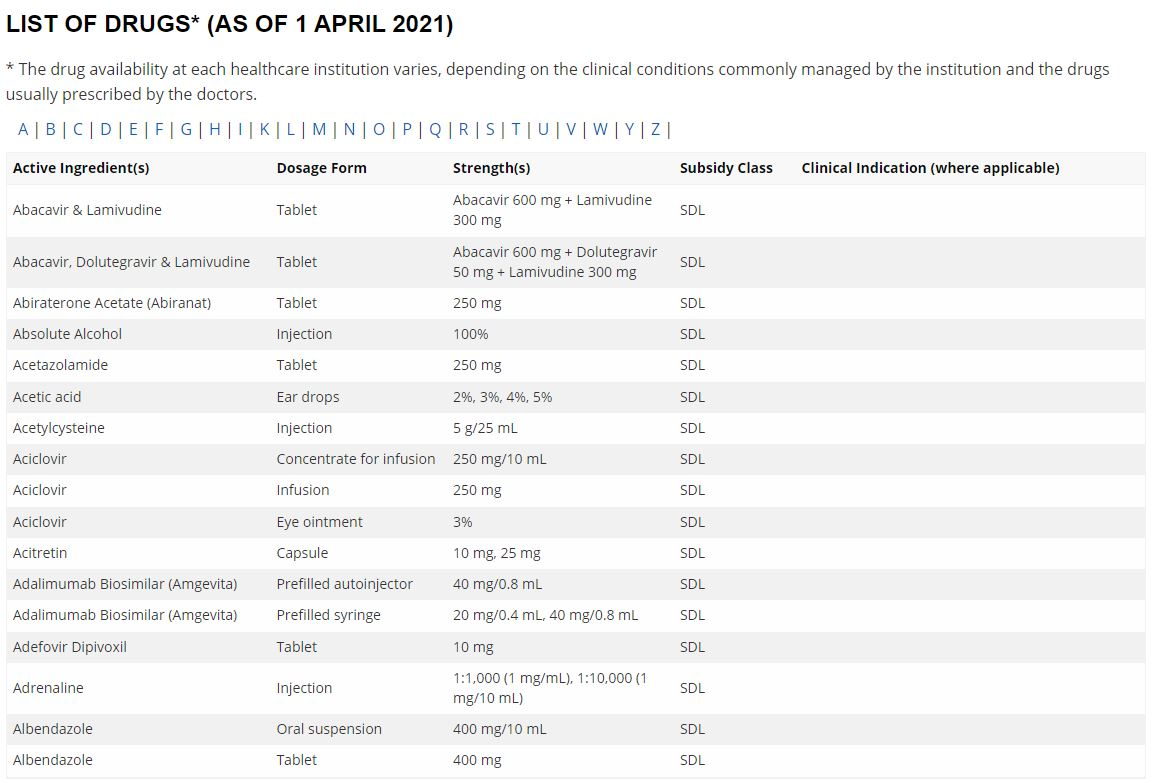

#### Table Title
- __List of Drugs (As of 1 April 2021)__

#### Column Headers
- __Active Ingredient(s)__: The ingredient in a pharmaceutical drug that is biologically active
- __Dosage Form__:The means which drug molecules are delivered to sites of action within the body example Tablet, Injection, Ear drops
- __Strength(s)__:The amount of drug in a given dosage form
- __Subsidy Class__:Refers to the subsidy class in Singapore. It can be classified as Standard Drug List (SDL) or Medication Assistance Fund (MAF)

Storing the column headers into a variable "column_headers"

In [2]:
column_headers=['Active Ingredient(s)','Dosage Form','Strength(s)','Subsidy Class','Clinical Indication']
column_headers

['Active Ingredient(s)',
 'Dosage Form',
 'Strength(s)',
 'Subsidy Class',
 'Clinical Indication']

## Section 4: Exploring the html<a id='html'></a>

In [3]:
source=requests.get('https://www.moh.gov.sg/cost-financing/healthcare-schemes-subsidies/drug-subsidies-schemes').text
soup=BeautifulSoup(source,'lxml')
soup.prettify()

'<!DOCTYPE html>\n<html class="no-js" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   MOH | Drug Subsidies &amp; Schemes\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="ie=edge" http-equiv="x-ua-compatible"/>\n  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n  <meta name="keywords"/>\n  <link href="../../assets/MOH_Corp/img/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="../../assets/MOH_Corp/img/Icon-60.png" rel="apple-touch-icon"/>\n  <meta content="w4zqH9fAlbYTbkWlHAyXH85MFv78fhJhgC919EyPpko" name="google-site-verification"/>\n  <meta content="Find out more about the list of drugs that is subsidised at our public hospitals, specialist outpatient clinics and polyclinics. \n" name="description"/>\n  <script type="text/javascript">\n   (function(h,o,t,j,a,r){\n        h.hj=h.hj||function(){(h.hj.q=h.hj.q||[]).push(arguments)};\n        h._hjSettings={hjid:1465941,hjsv:6};\n        a=o.getElementsByTagName(\'head\')[

### (i) Finding the title of table

In [4]:
title=soup.find('div',{"id":{"ContentPlaceHolder_contentPlaceholder_TB03B381D008_Col00"}}).h2.text
title

'List of Drugs* (as of 1 April 2021)'

### (ii) Finding the table data

- Data for drugs with name starting with different alphabet letters are arranged into different div id(s) as per picture below for example:
    - Information for Active Ingredient Aciclovir is in div id "A"
    - Information for Active Ingredient Benztropine is in div id "B"
    
    
- There are some alphabet letters that do not have any div id(s) (i.e. "J" and "X")
    - There is no drug  with active ingredient starting with alphabet "J" or "X" in the List of Drugs and thus there are no div id(s) with "J" and "X"

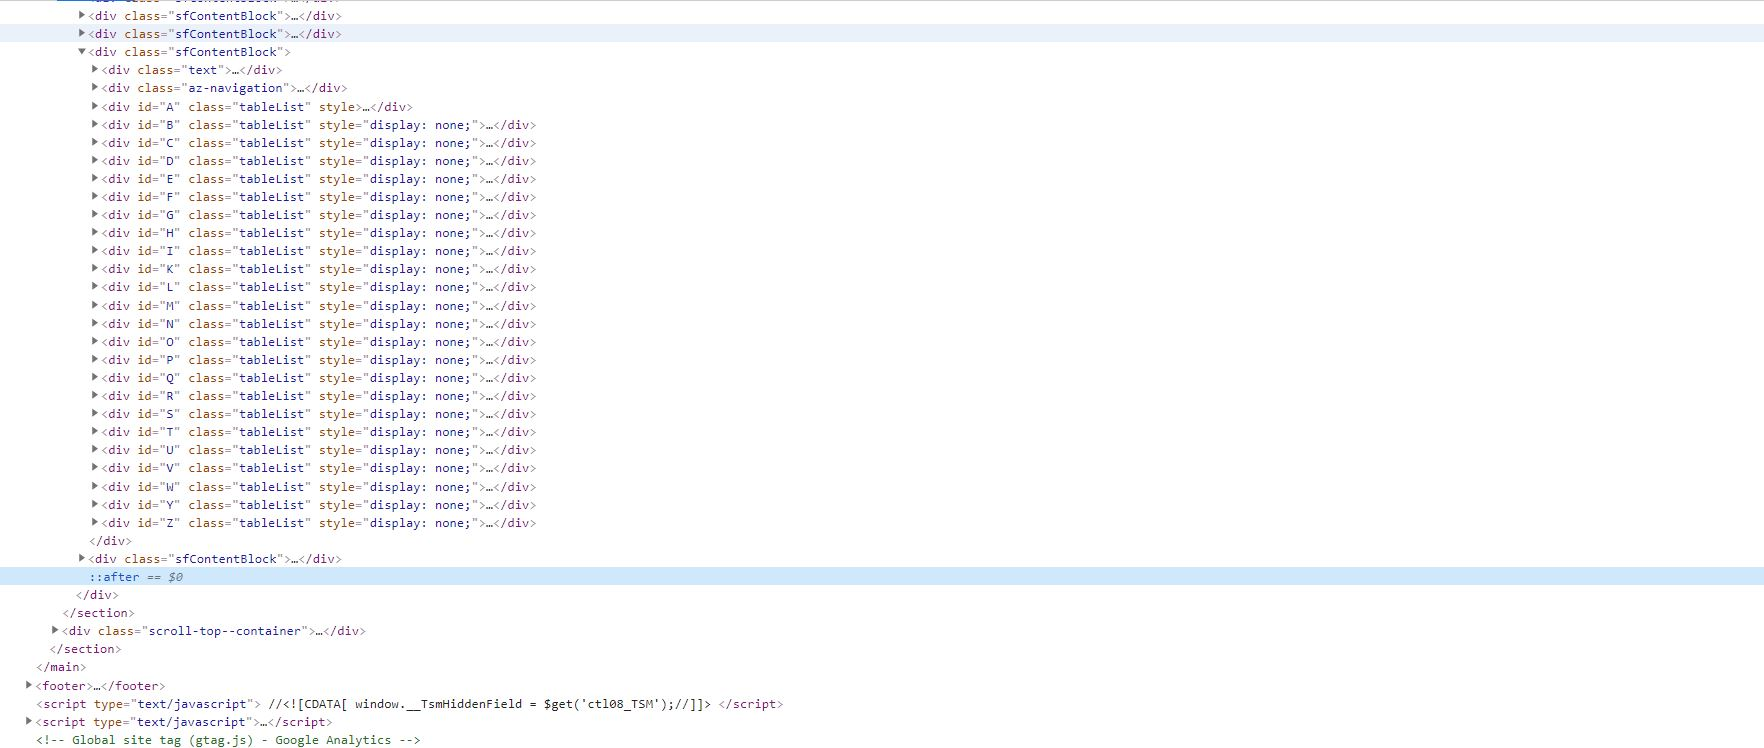

#### Exploring the HTML-Extracting data for all drugs starting with alphabet "A"

In [5]:
soup.find("div",{"id":{"A"}})

<div class="tableList" id="A">
<table>
<thead>
<tr>
<th width="23.19%">Active Ingredient(s)</th>
<th width="15.51%">Dosage Form</th>
<th width="19.92%">Strength(s)</th>
<th width="10.67%">Subsidy Class</th>
<th>Clinical Indication (where applicable)</th>
</tr>
</thead>
<tbody>
<tr><td>Abacavir &amp; Lamivudine</td><td>Tablet</td><td>Abacavir 600 mg + Lamivudine 300 mg</td><td>SDL</td><td> </td></tr><tr><td>Abacavir, Dolutegravir &amp; Lamivudine</td><td>Tablet</td><td>Abacavir 600 mg + Dolutegravir 50 mg + Lamivudine 300 mg</td><td>SDL</td><td> </td></tr><tr><td>Abiraterone Acetate (Abiranat)</td><td>Tablet</td><td>250 mg</td><td>SDL</td><td><br/></td></tr><tr>
<td>Absolute Alcohol </td>
<td>Injection</td>
<td>100%</td>
<td>SDL</td>
<td></td>
</tr>
<tr>
<td>Acetazolamide</td>
<td>Tablet</td>
<td>250 mg</td>
<td>SDL</td>
<td></td>
</tr>
<tr>
<td>Acetic acid</td>
<td>Ear drops</td>
<td>2%, 3%, 4%, 5%</td>
<td>SDL</td>
<td></td>
</tr>
<tr>
<td>Acetylcysteine</td>
<td>Injection</td><td>5 g

#### Exploring the HTML-Extracting data for all drugs starting with alphabet "A" into a list

In [6]:
list_a=soup.find("div",{"id":{"A"}}).table.tbody.find_all("tr")
print('There are '+ str(len(list_a))+' drugs in' +title + 'starting with alphabet letter "A"')


There are 67 drugs inList of Drugs* (as of 1 April 2021)starting with alphabet letter "A"


#### Exploring the HTML-Extracting data for the first drug starting with alphabet "A" (i.e. target first row)

In [7]:
first_row=list_a[0].find_all("td")
first_row

[<td>Abacavir &amp; Lamivudine</td>,
 <td>Tablet</td>,
 <td>Abacavir 600 mg + Lamivudine 300 mg</td>,
 <td>SDL</td>,
 <td> </td>]

#### Exploring the HTML-Extracting the required information for the for the  target first row

In [8]:
print('The Active ingredient(s) for the first row is '+ first_row[0].text)
print('The Dosage Form for the first row is '+ first_row[1].text)
print('The Stength(s) for the first row is '+ first_row[2].text)
print('The Subsidy Class for the first row is '+ first_row[3].text)
print('The Clinical Indication for the first row is '+ first_row[4].text)

The Active ingredient(s) for the first row is Abacavir & Lamivudine
The Dosage Form for the first row is Tablet
The Stength(s) for the first row is Abacavir 600 mg + Lamivudine 300 mg
The Subsidy Class for the first row is SDL
The Clinical Indication for the first row is  


Note: As per above code, most of the "Clinical Indication" information is left blank so we will need to use a Try-Except block in our code to catch for any potential error

####  Exploring the HTML-Creating a list of alphabet letters

- As mentioned before,there are some alphabet letters not inside the div id(s) (i.e. "J" and "X")
- Since this list of drug may be updated to include these alphabets, there is a need to dynamically create a list of alphabets that are inside (variable named as alphabet)
- The tag div id= "A"  has an attribute "id" whose value is "A". You can access the tag's attributes by treating the tag like a dictionary. Please see BeautifulSoup documentation [here](https://beautiful-soup-4.readthedocs.io/en/latest/#attributes)

In [9]:
print("The first alphabet is "+ soup.find_all("div",class_='tableList')[0]["id"])
print("The second alphabet is "+ soup.find_all("div",class_='tableList')[1]["id"])
print("The third alphabet is "+ soup.find_all("div",class_='tableList')[2]["id"])

The first alphabet is A
The second alphabet is B
The third alphabet is C


In [10]:
print("There are "+ str(len(soup.find_all("div",class_='tableList')))+ " alphabets in the List of Drugs now")


There are 24 alphabets in the List of Drugs now


In [11]:
divs=soup.find_all("div",class_='tableList')
alphabet=[]

for i in range(0,len(divs)):
    print(f'Number {i+1} in the alphabet list is {divs[i]["id"]}')
    alphabet.append(divs[i]['id'])


Number 1 in the alphabet list is A
Number 2 in the alphabet list is B
Number 3 in the alphabet list is C
Number 4 in the alphabet list is D
Number 5 in the alphabet list is E
Number 6 in the alphabet list is F
Number 7 in the alphabet list is G
Number 8 in the alphabet list is H
Number 9 in the alphabet list is I
Number 10 in the alphabet list is K
Number 11 in the alphabet list is L
Number 12 in the alphabet list is M
Number 13 in the alphabet list is N
Number 14 in the alphabet list is O
Number 15 in the alphabet list is P
Number 16 in the alphabet list is Q
Number 17 in the alphabet list is R
Number 18 in the alphabet list is S
Number 19 in the alphabet list is T
Number 20 in the alphabet list is U
Number 21 in the alphabet list is V
Number 22 in the alphabet list is W
Number 23 in the alphabet list is Y
Number 24 in the alphabet list is Z


## Section 5- Setting up Script<a id='Script'></a>

### (i) Scraping the data and creating pandas dataframe

In [14]:
df=pd.DataFrame(columns=column_headers)

for i in alphabet:
    
    for article in soup.find(f"div",{"id":{i}}).table.tbody.find_all('tr'):

        active_ingredient=article.find_all('td')[0].text

        dosage_form=article.find_all('td')[1].text

        strength=article.find_all('td')[2].text
        subsidy_class=article.find_all('td')[3].text
        try:
            clinical_indication=article.find_all('td')[4].text
        except Exception:
            clinical_indication=None
   
        append_series = pd.Series([active_ingredient,dosage_form,strength,subsidy_class,clinical_indication], index = df.columns)
        df=df.append(append_series,ignore_index=True)

df.head()

,Active Ingredient(s),Dosage Form,Strength(s),Subsidy Class,Clinical Indication
0,Abacavir & Lamivudine,Tablet,Abacavir 600 mg + Lamivudine 300 mg,SDL,
1,"Abacavir, Dolutegravir & Lamivudine",Tablet,Abacavir 600 mg + Dolutegravir 50 mg + Lamivud...,SDL,
2,Abiraterone Acetate (Abiranat),Tablet,250 mg,SDL,
3,Absolute Alcohol,Injection,100%,SDL,
4,Acetazolamide,Tablet,250 mg,SDL,


### (ii) Scraping the data and saving to csv file

In [13]:
file_name="mohlist.csv"

csv_file=open(file_name,'w',newline='', encoding="utf-8")
csv_writer=csv.writer(csv_file)
title=soup.find('div',{"id":{"ContentPlaceHolder_contentPlaceholder_TB03B381D008_Col00"}}).h2.text
csv_writer.writerow([title])
csv_writer.writerow(column_headers)


for i in alphabet:
    
    for article in soup.find(f"div",{"id":{i}}).table.tbody.find_all('tr'):

        active_ingredient=article.find_all('td')[0].text

        dosage_form=article.find_all('td')[1].text

        strength=article.find_all('td')[2].text
        subsidy_class=article.find_all('td')[3].text
        try:
            clinical_indication=article.find_all('td')[4].text
        except Exception:
            clinical_indication=None
        

        csv_writer.writerow([active_ingredient,dosage_form,strength,subsidy_class,clinical_indication])

print("Data has been scrapped and saved in your local directory as " + file_name)
csv_file.close()

Data has been scrapped and saved in your local directory as mohlist.csv


## Section 6: References<a id='References'></a>

- MOH's Website (https://www.moh.gov.sg/cost-financing/healthcare-schemes-subsidies/drug-subsidies-schemes)
- How to reference a IPython notebook cell in markdown?(https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown)